In [7]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def calculate_accuracies(data, thresholds):
    metrics = []
    for threshold in thresholds:
        correct_predictions_jaccard = sum(1 for item in data if item["similarity_score_jaccard"] >= threshold)
        correct_predictions_cosine = sum(1 for item in data if item["similarity_score_cosine"] >= threshold)
        total_questions = len(data)
        metrics.append({
            'Threshold': threshold,
            'Jaccard Accuracy': correct_predictions_jaccard / total_questions,
            'Cosine Accuracy': correct_predictions_cosine / total_questions
        })
    return pd.DataFrame(metrics)

In [9]:
with open('predictions.json', 'r') as file:
    data_with_context = json.load(file)['data']
with open('predictions_gpt.json', 'r') as file:
    data_without_context = json.load(file)['data']

thresholds = np.arange(0.0, 1.0, 0.01)

df_metrics_with_context = calculate_accuracies(data_with_context, thresholds)
df_metrics_without_context = calculate_accuracies(data_without_context, thresholds)

median_jaccard_with_context = df_metrics_with_context['Jaccard Accuracy'].median()
median_jaccard_without_context = df_metrics_without_context['Jaccard Accuracy'].median()
median_cosine_with_context = df_metrics_with_context['Cosine Accuracy'].median()
median_cosine_without_context = df_metrics_without_context['Cosine Accuracy'].median()

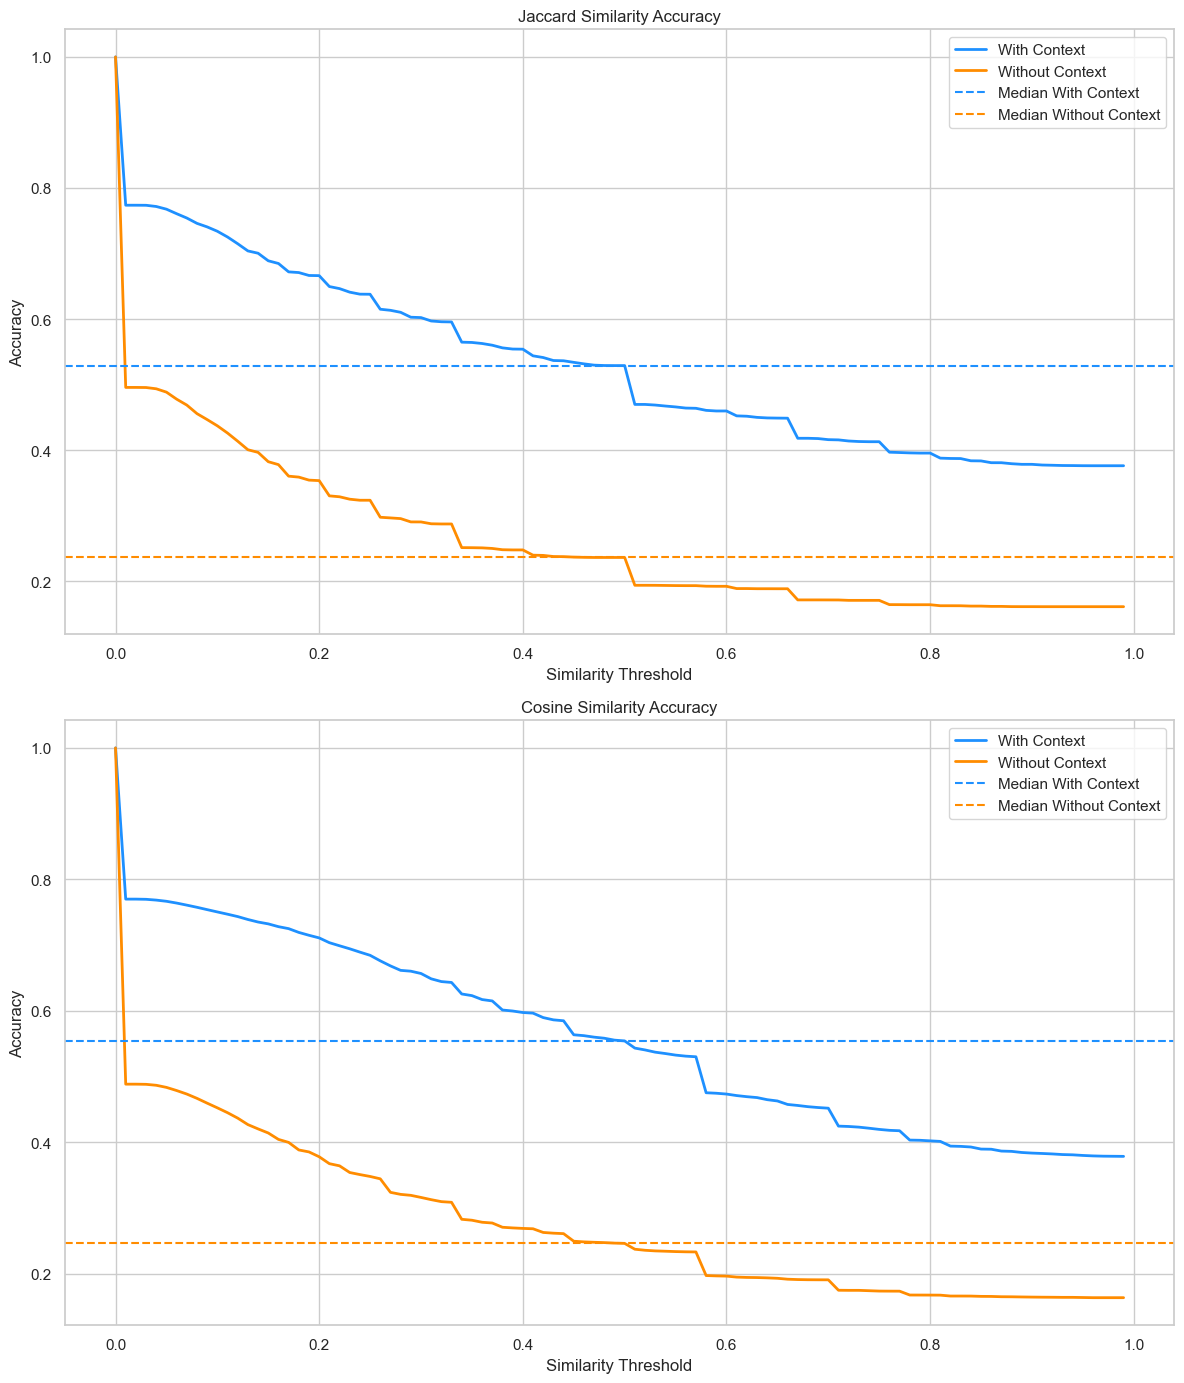

In [10]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

sns.lineplot(x='Threshold', y='Jaccard Accuracy', data=df_metrics_with_context, ax=axs[0], label='With Context', color='dodgerblue', lw=2)
sns.lineplot(x='Threshold', y='Jaccard Accuracy', data=df_metrics_without_context, ax=axs[0], label='Without Context', color='darkorange', lw=2)
axs[0].axhline(y=median_jaccard_with_context, color='dodgerblue', linestyle='--', label='Median With Context')
axs[0].axhline(y=median_jaccard_without_context, color='darkorange', linestyle='--', label='Median Without Context')
axs[0].set_title('Jaccard Similarity Accuracy')

sns.lineplot(x='Threshold', y='Cosine Accuracy', data=df_metrics_with_context, ax=axs[1], label='With Context', color='dodgerblue', lw=2)
sns.lineplot(x='Threshold', y='Cosine Accuracy', data=df_metrics_without_context, ax=axs[1], label='Without Context', color='darkorange', lw=2)
axs[1].axhline(y=median_cosine_with_context, color='dodgerblue', linestyle='--', label='Median With Context')
axs[1].axhline(y=median_cosine_without_context, color='darkorange', linestyle='--', label='Median Without Context')
axs[1].set_title('Cosine Similarity Accuracy')

for ax in axs:
    ax.set_xlabel('Similarity Threshold')
    ax.set_ylabel('Accuracy')
    ax.legend()

plt.tight_layout()
plt.savefig('model_comparison_accuracy.png', dpi=300)
plt.show()